#

# Data exploration and visualization weather data

Luisa Rodriguez

- load the dataset [Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations (trial, 2014 to 2015)](https://data.melbourne.vic.gov.au/explore/dataset/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/information/) into a Python Pandas dataframe and for each place of measurement and each type of data (temp, light, humidity) calculate and print nicely
  - median 
  - standard deviation 
- visualize each time series for respective places in the same figure as sugested in the charts below. The x-axis should have the correct time index indicated in the figure.

In [10]:
# activate pandas package
import pandas as pd
import numpy as np
import math  

Read in the CVS file into pandas DataFrame object with `read_cvs()`

In [11]:
data = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/exports/csv?lang=en&timezone=Europe%2FHelsinki&use_labels=true&delimiter=%2C")

In [12]:
data.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-02-28T01:30:00+02:00,0013a20040b315ec,1,501,21.6,21.6,21.6,93.8,93.8,93.8,...,57.8,57.8,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20150227233000,NaN,"-37.8148084, 144.980999"
1,2015-02-28T02:25:00+02:00,0013a20040b31571,1,510,22.9,22.9,22.9,90.1,90.1,90.1,...,40.6,40.6,ENV,-37.819712,144.941325,2.74,Docklands Library,510-20150228002500,NaN,"-37.8197121, 144.9413253"
2,2015-02-28T02:30:00+02:00,0013a20040b31583,1,509,23.9,23.9,23.9,90.9,90.9,90.9,...,40.3,40.3,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150228003000,NaN,"-37.8199043, 144.9404851"
3,2015-02-28T03:15:00+02:00,0013a20040b516ed,1,505,23.9,23.9,23.9,84.0,84.0,84.0,...,39.9,39.9,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20150228011500,NaN,"-37.813073, 144.9804061"
4,2015-02-28T04:15:00+02:00,0013a20040b31583,1,509,25.8,25.8,25.8,95.5,95.5,95.5,...,35.1,35.1,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150228021500,NaN,"-37.8199043, 144.9404851"


In [14]:
data.info(verbose = True, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [15]:
# some columns are totaly useless, you may want to drop them.
data.drop(columns=['mac', 'boardtype', 'Position', 'model', 'rowid'], inplace = True)
data.head(3)

,timestamp,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation,location,geolocation
0,2015-02-28T01:30:00+02:00,501,21.6,21.6,21.6,93.8,93.8,93.8,57.8,57.8,57.8,-37.814808,144.980999,29.96,Fitzroy Gardens,"-37.8148084, 144.980999"
1,2015-02-28T02:25:00+02:00,510,22.9,22.9,22.9,90.1,90.1,90.1,40.6,40.6,40.6,-37.819712,144.941325,2.74,Docklands Library,"-37.8197121, 144.9413253"
2,2015-02-28T02:30:00+02:00,509,23.9,23.9,23.9,90.9,90.9,90.9,40.3,40.3,40.3,-37.819904,144.940485,0.03,Docklands Library,"-37.8199043, 144.9404851"


Hmm, looks like some columns hold same values. Check if there are any rows where `temp_max`, `temp_min` and `temp_avg` are different. If there are none - drop `temp_max` and `temp_min`.

In [16]:
print(data.columns)

Index(['timestamp', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 'light_max',
       'light_min', 'light_avg', 'humidity_min', 'humidity_max',
       'humidity_avg', 'latitude', 'longitude', 'elevation', 'location',
       'geolocation'],
      dtype='object')


In [17]:
data.drop(['temp_max', 'temp_min', 'light_max',
       'light_min', 'humidity_min', 'humidity_max'], axis=1, inplace=True)

In [18]:
data.head()

,timestamp,boardid,temp_avg,light_avg,humidity_avg,latitude,longitude,elevation,location,geolocation
0,2015-02-28T01:30:00+02:00,501,21.6,93.8,57.8,-37.814808,144.980999,29.96,Fitzroy Gardens,"-37.8148084, 144.980999"
1,2015-02-28T02:25:00+02:00,510,22.9,90.1,40.6,-37.819712,144.941325,2.74,Docklands Library,"-37.8197121, 144.9413253"
2,2015-02-28T02:30:00+02:00,509,23.9,90.9,40.3,-37.819904,144.940485,0.03,Docklands Library,"-37.8199043, 144.9404851"
3,2015-02-28T03:15:00+02:00,505,23.9,84.0,39.9,-37.813073,144.980406,29.91,Fitzroy Gardens,"-37.813073, 144.9804061"
4,2015-02-28T04:15:00+02:00,509,25.8,95.5,35.1,-37.819904,144.940485,0.03,Docklands Library,"-37.8199043, 144.9404851"


Try to print out the folowing information automaticaly with 5-6 lines of code ([for-loop](https://www.w3schools.com/python/python_for_loops.asp)):

`Fitzroy Gardens
	board 501 - rows 2903
	board 502 - rows 2725
	board 505 - rows 2915
	board 507 - rows 2918
	board 508 - rows 2728
Docklands Library
	board 506 - rows 6626
	board 509 - rows 19119
	board 510 - rows 12038
	board 511 - rows 4598`

In [19]:
for i in np.unique(data["location"])[::-1]:
    print(f'{i}', end = ' ')
    id_list = np.sort(np.unique(data.loc[data["location"]== i]["boardid"]))
    for j in id_list:
        n = np.shape(np.where((data['boardid'] == j) & (data['location'] == i)))[1]
        print(f' board  {j} - rows {n}', end = ' ')

Fitzroy Gardens  board  501 - rows 2903  board  502 - rows 2725  board  505 - rows 2915  board  507 - rows 2918  board  508 - rows 2728 Docklands Library  board  506 - rows 6626  board  509 - rows 19119  board  510 - rows 12038  board  511 - rows 4598 

## Median (aka expected value)

You'd like to have a function that takes an unsorted pandas.Series object (or a list) and returns a median for it.

Sort the serie: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html (or your list).

There are two opotions: odd and even number of elements.

If the number is odd, return an element with the index 'length of serie floor divided by 2'

If the number is even, return a half sum of two middle elements.

You can use `.iloc[]` to access the position of a row if pandas.Series object. Remember that the position is zero-based. https://stackoverflow.com/a/31593712

In [20]:
def median (serie):
    "input:  pandas series"
    "output: float representing the median of series"
    
    serie2 = (serie.copy().dropna()).sort_values(ascending = True)
    serie2 = serie2.reset_index(drop=True)
    #print(serie2)
    n = len(serie2)
    if np.mod(n, 2) == 0:
        m = (serie2.iloc[int(n/2)] + serie2.iloc[int(n/2 - 1)])/2
    else:
        m = serie2.iloc[math.floor(int(n/2))] 
    return(m)

In [21]:
# median test
ts = [pd.Series([4,3,1,2])]
ts.append(pd.Series([4,3,1,2,100]))
ts.append(pd.Series([4,3,1,2,None]))
ts.append([1,4,3,2])
for test in ts:
    if type(test) == pd.Series : 
        print(median(test), test.median())

2.5 2.5
3 3.0
2.5 2.5


Implement the function `print_stats`, please.

In [22]:
def print_stats(func, title = '', data = None):
    "input:   func    statistic function applied to a series"
    "         title   string representing the title for the summary"
    "         data    pandas data frame"
    "output:  prints the summary statistics"
    
    print(title)

    for i in np.unique(data["location"]):
        temp_all = func(data.loc[data["location"] == i]["temp_avg"])
        light_all = func(data.loc[data["location"] == i]["light_avg"])
        humidity_all = func(data.loc[data["location"] == i]["humidity_avg"])
    
        print(f'{i}')
        print(f'    temp {temp_all :>11}')
        print(f'    light {light_all :>10}')
        print(f'    humidity {humidity_all :>7}')
    
        id_list = np.sort(np.unique(data.loc[data["location"]== i]["boardid"]))
    
        for j in id_list:
            aux = data.loc[np.where((data['boardid'] == j) & (data['location'] == i))]
            aux_t = pd.Series(aux.reset_index(drop=True)["temp_avg"])
            aux_l = pd.Series(aux.reset_index(drop=True)["light_avg"])
            aux_h = pd.Series(aux.reset_index(drop=True)["humidity_avg"])
            aux_e = pd.Series(aux.reset_index(drop=True)["elevation"])

            print(f'   board {j} - elevation {func(aux_e)}')
            print(f'            temp {func(aux_t) :>11}')
            print(f'            light {func(aux_l) :>10}')
            print(f'            humidity {func(aux_h) :>7}')

Here is the example result of the function call:

In [23]:
print_stats (median, title='Medians for locations:', data=data)

Medians for locations:
Docklands Library
    temp        17.4
    light       13.1
    humidity    51.9
   board 506 - elevation 0.71
            temp        16.5
            light        8.5
            humidity    48.6
   board 509 - elevation 0.03
            temp        17.4
            light       29.1
            humidity    56.2
   board 510 - elevation 2.74
            temp        17.1
            light      73.75
            humidity    49.2
   board 511 - elevation 3.75
            temp        18.7
            light      13.55
            humidity    50.2
Fitzroy Gardens
    temp        19.0
    light       83.9
    humidity    47.7
   board 501 - elevation 29.96
            temp        19.0
            light       88.2
            humidity    47.3
   board 502 - elevation 22.57
            temp        18.1
            light       84.6
            humidity    49.9
   board 505 - elevation 29.91
            temp        20.0
            light       78.3
            humidity    

## Standard deviation

Write a function that takes `pandas.Series` object and returns standard deviation.

First calculate `mean = serie.sum() / serie.count()`

Then make a Series object which contains `squares_off_difference` between every measured value and the `mean`.

Then return sqrt of ratio of `squares_off_difference.sum()` to number of elements in `serie` minus 1.

Note: I am basing my calculations on the definition of standard derivation: $$\sigma = \sqrt{\frac{\sum (x - \bar{x})^2}{n-1} }$$ where $n$ and $\bar{x}$ are the size, and the mean of the sample, respectively.

In [24]:
def st_dev (ser):
    "input:  ser    series"
    "output: v      float value representing the standard derivation"
    
    n = ser.count()
    mean = ser.sum()/n
    v = np.pow((sum([np.pow((x - mean), 2) for x in ser])/(n - 1)), 1/2)
    return (v)

In [25]:
test = pd.Series(range(10))
print(st_dev(test));  print(test.std())

3.0276503540974917
3.0276503540974917


You can reuse your solution for median printout, now with `st_dev` function

In [26]:
print_stats (st_dev, title = 'St. dev. for locations:', data = data)

St. dev. for locations:
Docklands Library
    temp 5.667560241023732
    light 43.96524426170824
    humidity 11.880782111548001
   board 506 - elevation nan
            temp 5.384911871937587
            light 39.273117358601915
            humidity 14.654803635444043
   board 509 - elevation nan
            temp 5.519770834498894
            light 44.774208264442194
            humidity 11.812527950966999
   board 510 - elevation nan
            temp 6.062988612574092
            light 45.242772209050884
            humidity 8.616975199609453
   board 511 - elevation nan
            temp 5.218765467205762
            light 41.320870542623474
            humidity 11.639849631941075
Fitzroy Gardens
    temp 4.735745529488213
    light 43.51274400980726
    humidity 16.898744788579833
   board 501 - elevation 3.553325740770552e-15
            temp 5.264597595776853
            light 44.83696767853208
            humidity 28.191045574139398
   board 502 - elevation 7.106731464679544e-15


## Visualization

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [28]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

Have a look at https://pandas.pydata.org/pandas-docs/stable/timeseries.html

Have you noticed that column `timestamp` in our data is a string? We have to convert it to `pandas.Timestamp` to be able to plot measurements correctly.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [29]:
type(data.timestamp[0])

str

In [30]:
type(data.index)

pandas.core.indexes.range.RangeIndex

In [31]:
data["timestamp"]

0        2015-02-28T01:30:00+02:00
1        2015-02-28T02:25:00+02:00
2        2015-02-28T02:30:00+02:00
3        2015-02-28T03:15:00+02:00
4        2015-02-28T04:15:00+02:00
                   ...            
56565    2015-01-09T00:00:00+02:00
56566    2015-01-09T00:05:00+02:00
56567    2015-01-09T00:15:00+02:00
56568    2015-01-09T00:25:00+02:00
56569    2015-01-09T01:00:00+02:00
Name: timestamp, Length: 56570, dtype: object

In [21]:
ts_objects = [pd.Timestamp(ts, tz = "UTC") for ts in data["timestamp"]]

In [22]:
data.index = pd.to_datetime(ts_objects, utc = True)
data.index = data.index.tz_convert(None)

In [23]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Now we can use our index as timebased. Note that values are non unique and there will be a small performance penalty: https://stackoverflow.com/a/16629125 

In [24]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

Now we can easily plot all measurements from some location and from some period of time.

For example: average temperature at *Fitzroy Gardens* only from 2014.

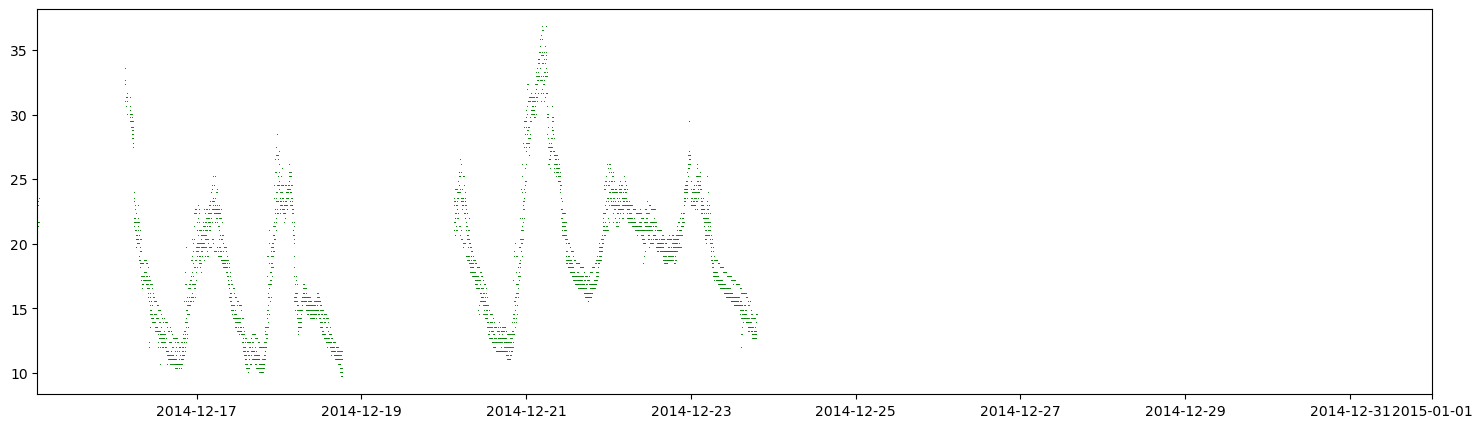

In [25]:
# model
t_min = data.index.min()
t_max = pd.Timestamp('2015-01-01')

plt.figure(figsize=(18,5))
plt.xlim(t_min, t_max)

location_filter = data.location == 'Fitzroy Gardens'
time_filter     = data.index < t_max
data_filtered   = data[location_filter & time_filter]
#boards          = data_filtered.boardid.unique()

plt.plot(data_filtered.index, data_filtered.temp_avg, ',', c = 'g', alpha=.9)
plt.show()

Can you color separate different boards?

Can your plot the median?

In [26]:
xmin, xmax = data.index.min(), pd.Timestamp('2015-01-01')
measurments = ['temp_avg', 'light_avg', 'humidity_avg']
colors = ['#d73027','#f46d43','#fdae61','#FFBF00','#aaaa9a','#82FA58','#a6d96a','#66bd63','#1a9850']
colors_2 = ["orange","green"]

In [27]:
def plot_measurements(func, title, measurement, xmin, xmax, colors, colors_2):
    chart = plt.figure(figsize = (18, 8))
    plt.xlim(xmin, xmax) # time limits for the chart

    c = 0
    legend = []
    c2 = 0
    location_list = np.unique(data["location"])

    for i in location_list:
        measurement_all = func(data.loc[data["location"] == i][measurement])

        time_filter     = data.index < t_max
        location_filter =  data.location == i
        id_list = np.sort(np.unique(data.loc[data["location"]== i]["boardid"]))
        for j in id_list:
            station_filter = data.boardid == j
            data_filtered   = data[location_filter & time_filter & station_filter]
            plt.plot(data_filtered.index, data_filtered[measurement], '.', c = colors[c], alpha = .4)
            plt.hlines(y = measurement_all, xmin = xmin, xmax = xmax, colors = colors_2[c2], linestyles = ['--'])
            legend.append( str(j))
            c = c + 1
        c2 = c2 + 1
        
    legend_elements = [
        Line2D([0], [0], color = colors_2[0], lw = 1, linestyle='--',label = location_list[0]), 
        Line2D([0], [0], color = colors[0],marker='o', lw=0, label = legend[0]),  
        Line2D([0], [0], color = colors[1], marker='o', lw=0, label = legend[1]),
        Line2D([0], [0], color = colors[2],marker='o', lw=0, label = legend[2]),
        Line2D([0], [0], color = colors[3], marker='o',lw=0, label = legend[3]),
    
        Line2D([0], [0], color = colors_2[1], lw=1,linestyle='--', label = location_list[1]),  
        Line2D([0], [0], color = colors[4], marker='o', lw = 0, label = legend[4]),
        Line2D([0], [0], color = colors[5], marker='o', lw = 0,label = legend[5]),
        Line2D([0], [0], color = colors[6], marker='o', lw = 0,label = legend[6]),
        Line2D([0], [0], color = colors[7],marker='o', lw = 0,label = legend[7]),
        Line2D([0], [0], color = colors[8],marker='o', lw = 0,label = legend[8])
    ]
    plt.legend(handles = legend_elements, loc = 'upper right', title = ' Sensor station')
    plt.title(title)
    #plt.grid(color = 'b', linestyle = '--', linewidth = 0.5, alpha=.5)

    plt.show()

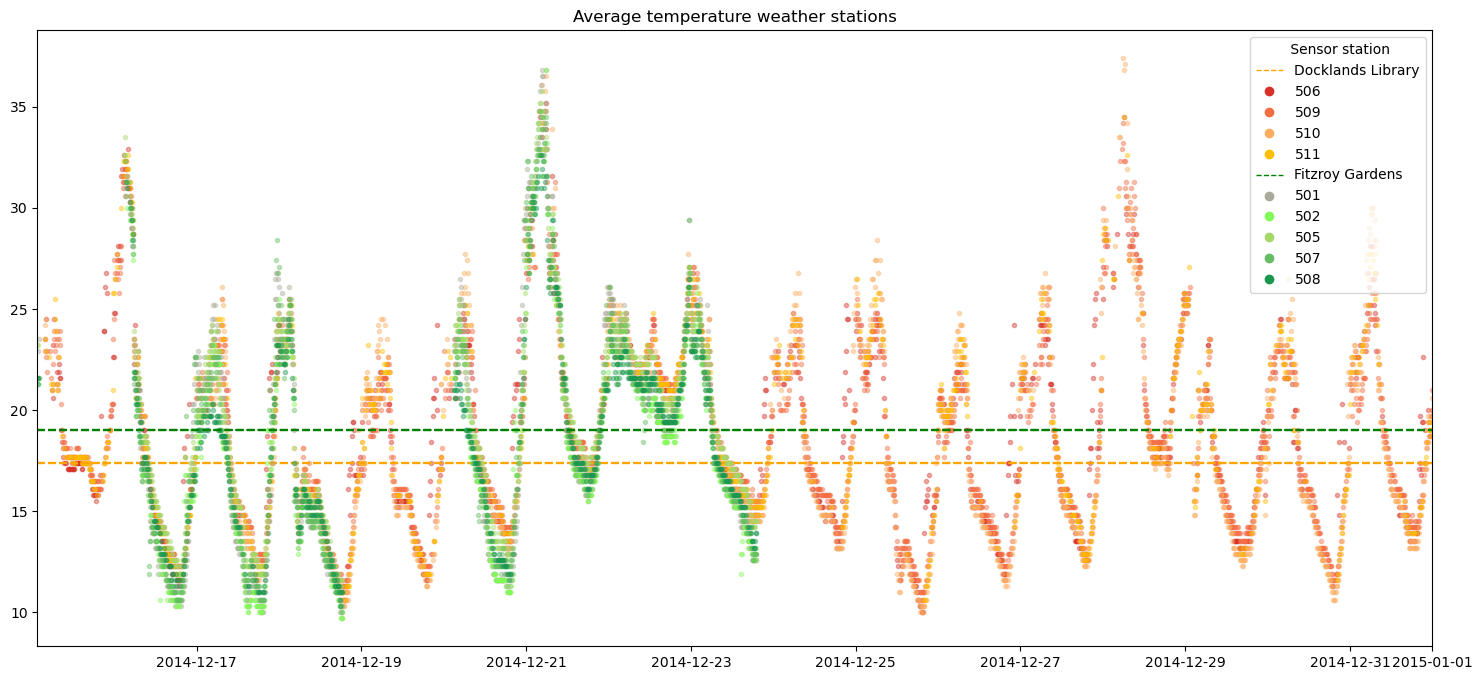

In [28]:
plot_measurements(func = median, title = "Average temperature weather stations", measurement = measurments[0], xmin = xmin, xmax = xmax, colors = colors, colors_2 = colors_2)

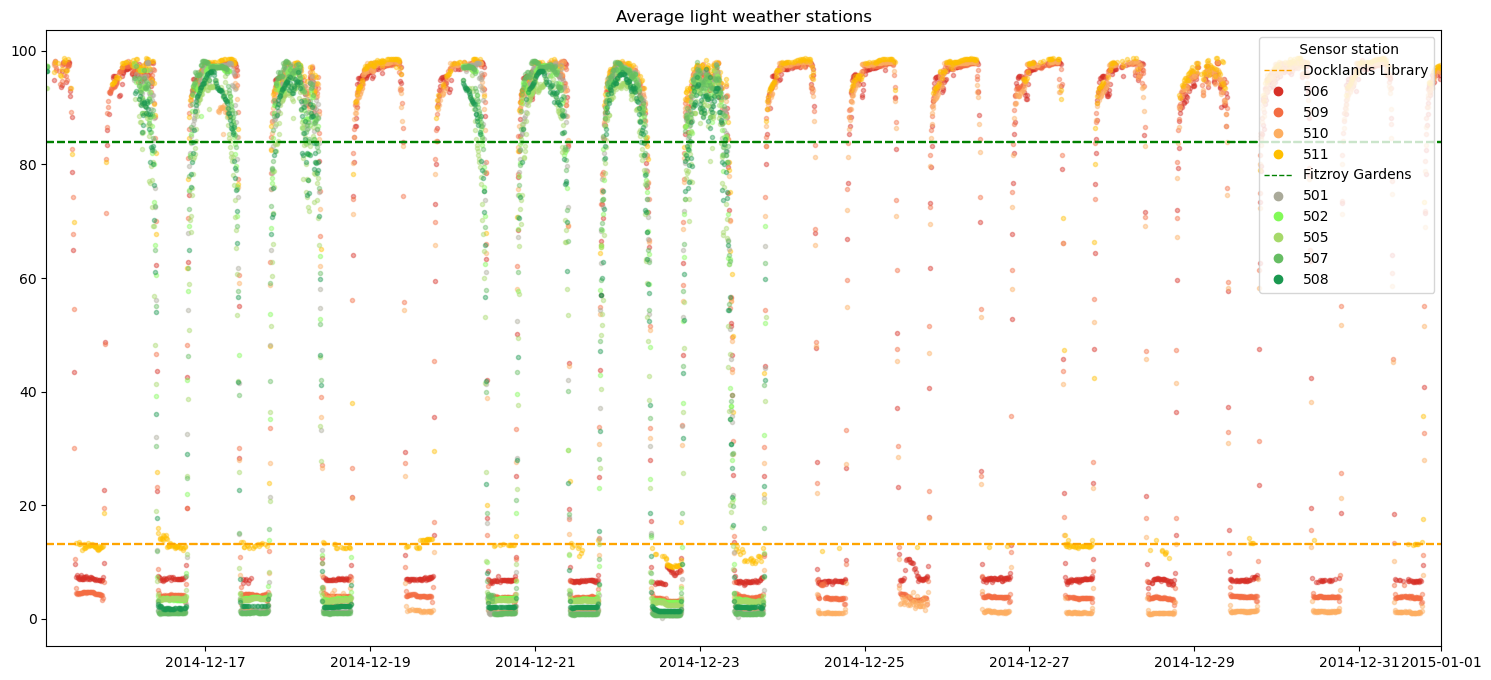

In [29]:
plot_measurements(func = median, title = "Average light weather stations", measurement = measurments[1], xmin = xmin, xmax = xmax, colors = colors, colors_2 =colors_2)

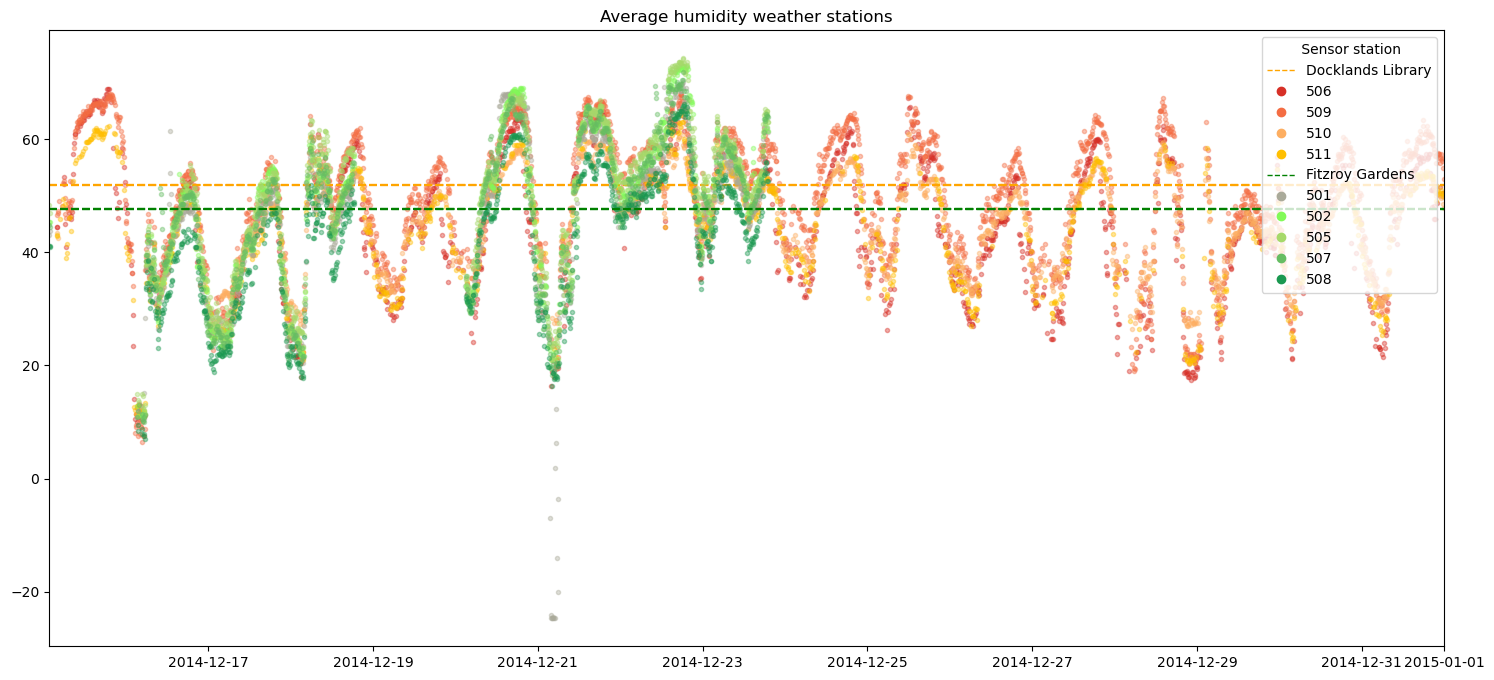

In [30]:
plot_measurements(func = median, title = "Average humidity weather stations", measurement = measurments[2], xmin = xmin, xmax = xmax, colors = colors, colors_2 = colors_2)

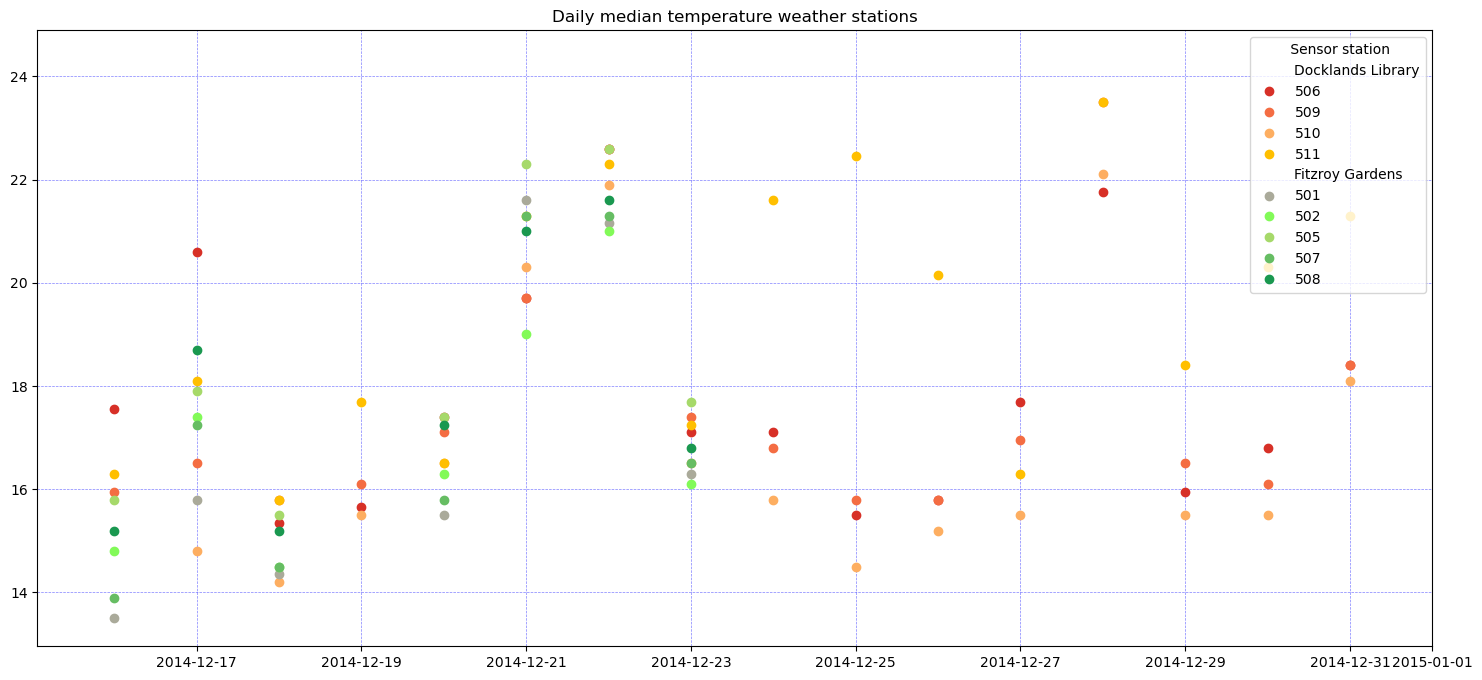

In [31]:
chart = plt.figure(figsize = (18, 8))
plt.xlim(xmin, xmax) 

dates = np.unique((data.index).strftime('%Y-%m-%d'))
dates_th = dates[dates < "2015-01-02"]
location_list = np.unique(data["location"])

c = 0
legend = []
for i in location_list:
    location_filter = data.location == i
    id_list = np.sort(np.unique(data.loc[data["location"] == i]["boardid"]))
    for j in id_list:
        station_filter = data.boardid == j
        
        for t in range(len(dates_th) - 1):
            time_filter =  (dates_th[t] < data.index) & (data.index < dates_th[t + 1]) #data.index < t_max
            data_filtered = data[location_filter & time_filter & station_filter]
            if len(data_filtered) > 0:
                temp_median = median(data_filtered["temp_avg"])
                plt.plot(pd.Timestamp(dates_th[t]), temp_median, 'o', c = colors[c] )
        c = c+1
        legend.append( str(j))

legend_elements = [
    Line2D([0], [0], color = colors[0], lw = 0, label = location_list[0]), 
    Line2D([0], [0], color = colors[0], marker = 'o', lw = 0, label =legend[0]),  
    Line2D([0], [0], color = colors[1], marker = 'o', lw = 0, label =legend[1]),
    Line2D([0], [0], color = colors[2], marker = 'o', lw = 0, label =legend[2]),
    Line2D([0], [0], color = colors[3], marker = 'o', lw = 0, label =legend[3]),
    
    Line2D([0], [0], color = colors[4], lw = 0, label = location_list[1]),  
    Line2D([0], [0], color = colors[4], marker = 'o', lw = 0, label = legend[4]),
    Line2D([0], [0], color = colors[5], marker = 'o', lw = 0, label = legend[5]),
    Line2D([0], [0], color = colors[6], marker = 'o', lw = 0, label = legend[6]),
    Line2D([0], [0], color = colors[7], marker = 'o', lw = 0, label = legend[7]),
    Line2D([0], [0], color = colors[8], marker = 'o', lw = 0, label = legend[8])
]
plt.legend(handles = legend_elements, loc = 'upper right', title = ' Sensor station')
plt.title("Daily median temperature weather stations")
plt.grid(color = 'b', linestyle = '--', linewidth = 0.5, alpha=.5)

plt.show()

In [32]:
def get_sub_ax(ax, xbound=(data.index.min(), data.index.max()), ybound=(0, 100)):
    ax_i = ax.twinx(); 
    ax_i.set_ybound(ybound);
    ax_i.set_xbound(xbound)
    ax_i.set_autoscaley_on(False); 
    ax_i.yaxis.tick_left()
    ax_i.grid(b=True, color='b', alpha=.1, axis='y') 
    return ax_i

In [33]:
def plot_time_range(t_min_str, t_max_str,  marker=',', resample='15Min'):
    measurements = ['temp_avg', 'light_avg', 'humidity_avg']

    colors = ["red", "green", "blue", "magenta", "yellow", "cyan"]
    chart = plt.figure(figsize = (18, 8))
    xmin = pd.Timestamp(t_min_str)
    xmax = pd.Timestamp(t_max_str)
    
    plt.xlim(xmin, xmax) 

    location_list = np.unique(data["location"])
    time_filter = ((xmin < data.index) | (xmin == data.index)) & ((xmax > data.index) | (xmax == data.index)) & (xmin < data.index) & (xmax > data.index)
    c = 0
    for i in location_list:
        location_filter =  data.location == i
        data_filtered   = data[location_filter & time_filter]
        
        for m in measurements:
            data_filtered_res = data_filtered[m].resample(resample).mean()
            plt.plot(data_filtered_res.index, data_filtered_res, marker, c = colors[c])
            c = c + 1
            
    legend_elements1 = [
        Line2D([0], [0], color = colors[0], lw = 0, label = location_list[0]), 
        Line2D([0], [0], color = colors[0], marker = 'o', lw = 0, label = measurements[0]),  
        Line2D([0], [0], color = colors[1], marker = 'o', lw = 0, label = measurements[1]),
        Line2D([0], [0], color = colors[2], marker = 'o', lw = 0, label = measurements[2])
    ]
    legend_elements2 = [
        Line2D([0], [0], color = colors[3], lw = 0, label = location_list[1]),  
        Line2D([0], [0], color = colors[3], marker = 'o', lw = 0, label = measurements[0]),
        Line2D([0], [0], color = colors[4], marker = 'o', lw = 0, label = measurements[1]),
        Line2D([0], [0], color = colors[5], marker = 'o', lw = 0, label = measurements[2])
      
    ]
    legend1 = plt.legend(handles = legend_elements1, bbox_to_anchor=(1, 1))
    legend2 = plt.legend(handles = legend_elements2, bbox_to_anchor=(1, 0.8))

    plt.gca().add_artist(legend1)
    plt.grid(color = 'b', linestyle = '--', linewidth = 0.5, alpha=.5)
    plt.show()

## now we can easily plot different time ranges

Note: The function plot_time_range(.) resamples the measurements as the mean!

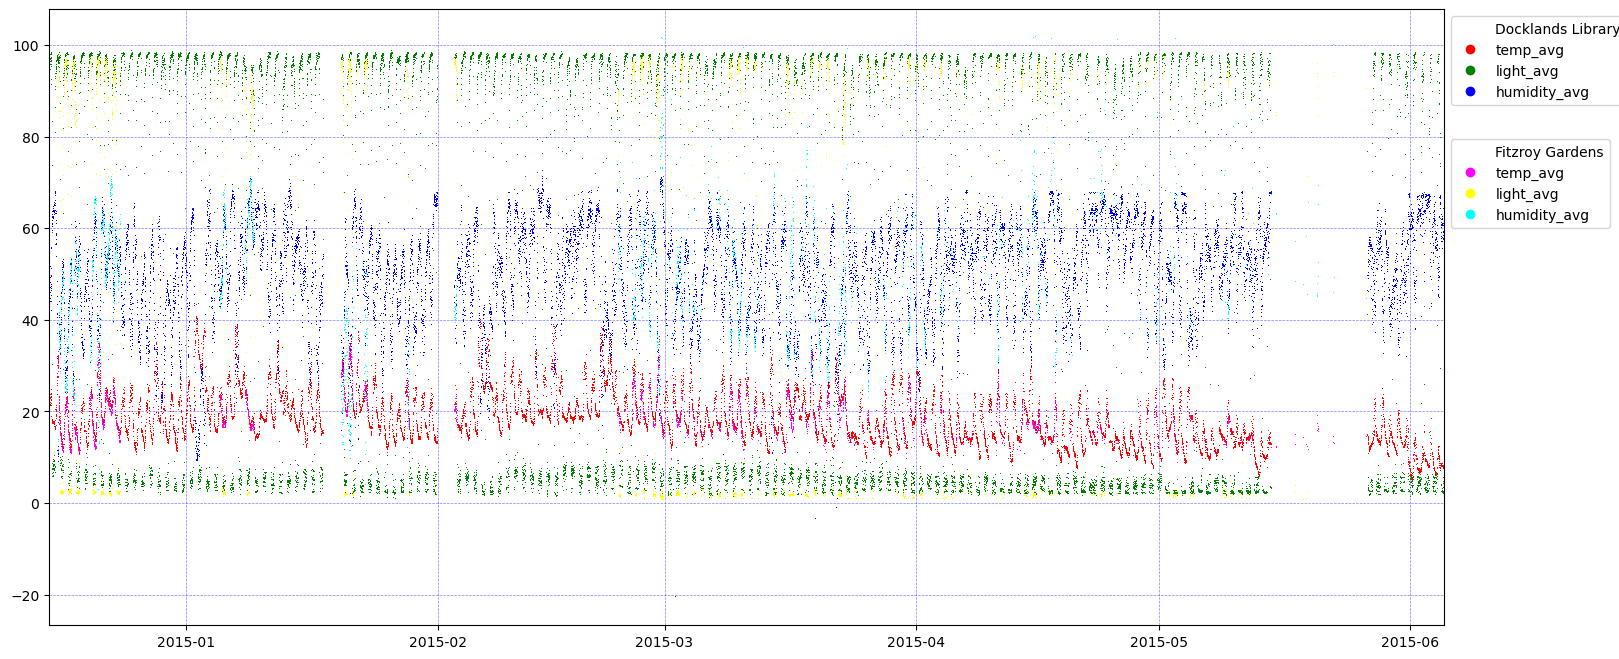

In [34]:
plot_time_range (data.index.min(), data.index.max())

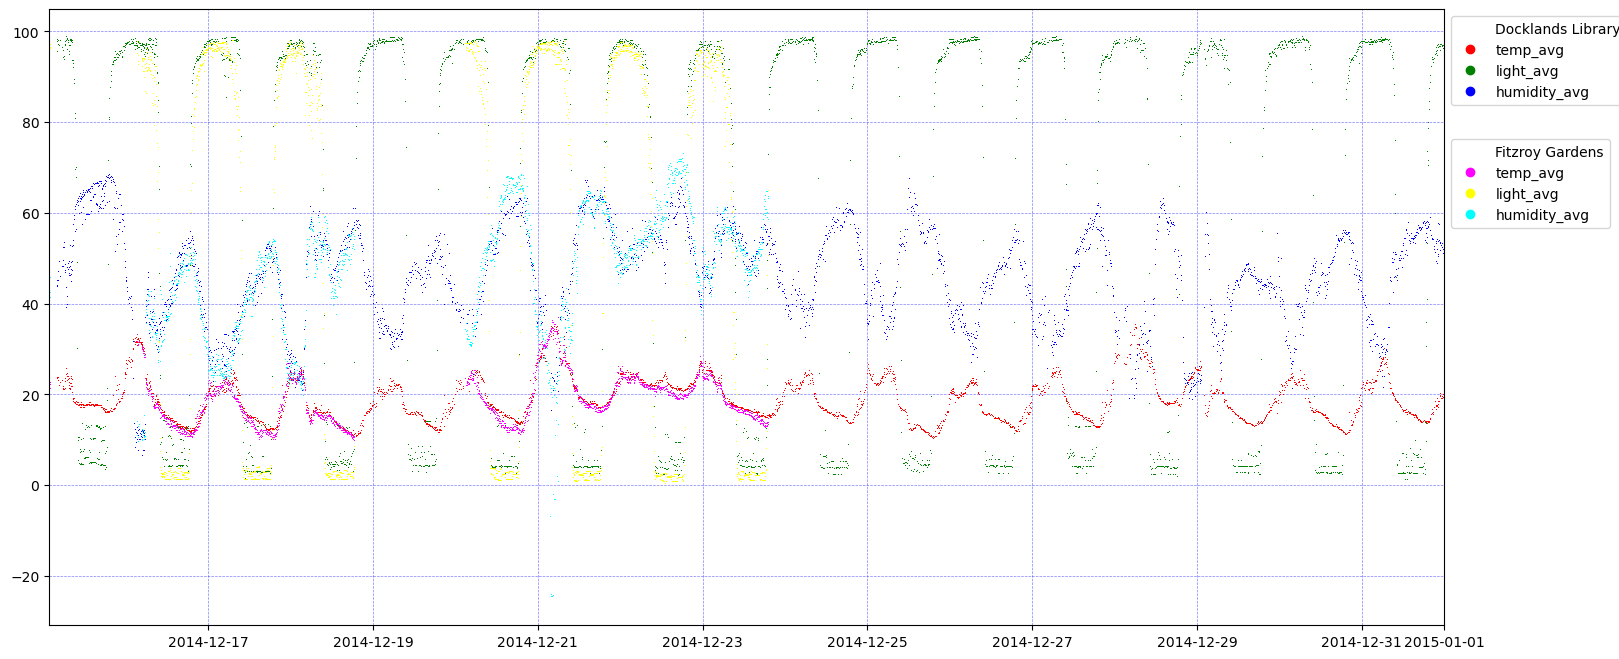

In [35]:
plot_time_range (data.index.min(), '2015-01-01', marker = ',', resample = '5Min')

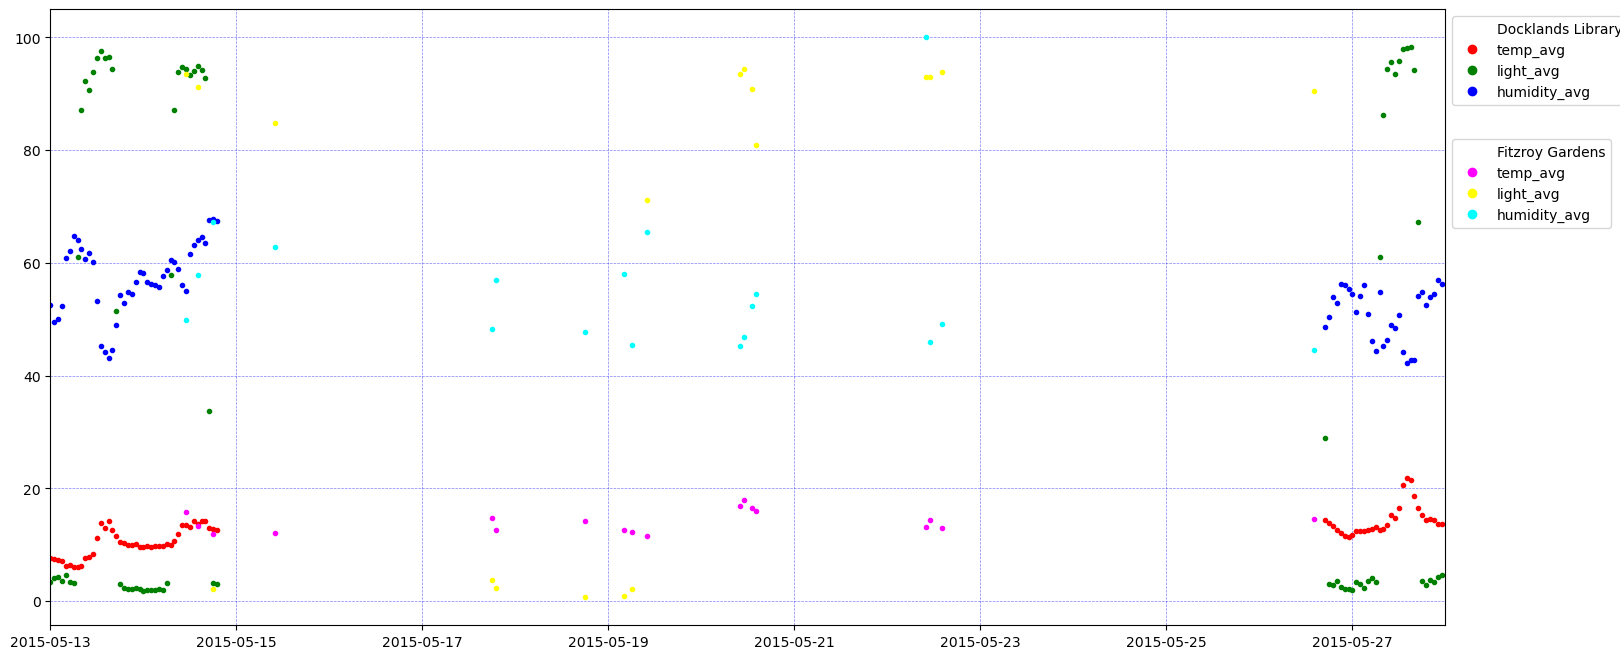

In [36]:
plot_time_range ( '2015-05-13', '2015-05-28', marker = '.', resample = 'h')